In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pint import Quantity as Q



%cd ..

from API.HPC_SPLIT import HPC_SPLIT_RANGES, HPC_SPLIT_SETUP
f = %pwd
f

e:\REMOTE\YandexDisk\МЭИ\ДИПЛОМ\Часть №2


'e:\\REMOTE\\YandexDisk\\МЭИ\\ДИПЛОМ\\Часть №2'

In [11]:
se1 = HPC_SPLIT_SETUP(
    fp_0        =   Q(8.73, "MPa"),
    fh_0        =   Q(3563.4, "kJ/kg"),
    n           =   Q(95, '1/s') ,
    G_0         =   Q(38.88, "kg/s"),
    p_z         =   Q(1.8, "MPa"),
    etaHPC_oi   =   0.846,
    FAST_MODE= True,
    isSectionFirst= True,
    ID = 1
)

alpha_1eef_range = [7,45, 1]
alpha_1eef_range_vec = np.arange(*alpha_1eef_range)

split_1 = HPC_SPLIT_RANGES(
    setup=se1,
    d_1_range=[0.3,1.2,0.01],
    alpha_1eef_range=alpha_1eef_range,
    rho_k_range=[0.03,0.07,0.01]
)

split_1

e:\REMOTE\YandexDisk\МЭИ\ДИПЛОМ\Часть №2\Разбивка\API\HPC_SPLIT.py:713: RuntimeWarning: divide by zero encountered in scalar divide
  k_l = (l_2z - l_21)/(self.__Z-1)
e:\REMOTE\YandexDisk\МЭИ\ДИПЛОМ\Часть №2\Разбивка\API\HPC_SPLIT.py:714: RuntimeWarning: divide by zero encountered in scalar divide
  b_l = (l_21*self.__Z - l_2z)/(self.__Z-1)
e:\REMOTE\YandexDisk\МЭИ\ДИПЛОМ\Часть №2\Разбивка\API\HPC_SPLIT.py:722: RuntimeWarning: invalid value encountered in add
  return k_l*z_i + b_l


,n,d_1,alpha_1eef,rho_k,Z,Z_new,Z_ratio,q_t,Delta_H,l_11,d_next,d_k,ID,__isOK
0,95,0.30,7.0,0.03,37.0,37.898514,1.024284,0.000940,0.317261,0.171474,0.506231,0.125526,None,1.0
1,95,0.30,7.0,0.04,39.0,39.050622,1.001298,0.000913,0.016457,0.180398,0.512064,0.116602,None,1.0
2,95,0.30,7.0,0.05,40.0,40.307934,1.007698,0.000885,0.094558,0.189721,0.518109,0.107279,None,1.0
3,95,0.30,7.0,0.06,41.0,41.762880,1.018607,0.000855,0.220577,0.202062,0.525845,0.094938,None,1.0
4,95,0.30,7.0,0.07,43.0,43.411158,1.009562,0.000823,0.109045,0.215933,0.534034,0.081067,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17095,95,1.19,44.0,0.03,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0.0
17096,95,1.19,44.0,0.04,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0.0
17097,95,1.19,44.0,0.05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0.0
17098,95,1.19,44.0,0.06,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None,0.0


In [12]:
from colour import Color
blue = Color("blue")
colors = list(blue.range_to(Color('green'),len(alpha_1eef_range_vec)))


colors_dict = {}
for index,alpha in enumerate(alpha_1eef_range_vec):
    colors_dict[alpha] = colors[index].hex

colors_dict

{7: '#00f',
 8: '#000efc',
 9: '#001bf8',
 10: '#0028f5',
 11: '#0034f1',
 12: '#0040ee',
 13: '#004cea',
 14: '#0057e7',
 15: '#0062e4',
 16: '#006de0',
 17: '#07d',
 18: '#0081d9',
 19: '#008bd6',
 20: '#0094d2',
 21: '#009dcf',
 22: '#00a5cc',
 23: '#00adc8',
 24: '#00b5c5',
 25: '#00bcc1',
 26: '#00beb9',
 27: '#00baab',
 28: '#00b79e',
 29: '#00b392',
 30: '#00b085',
 31: '#00ad79',
 32: '#00a96e',
 33: '#00a663',
 34: '#00a258',
 35: '#009f4d',
 36: '#009b43',
 37: '#00983a',
 38: '#009530',
 39: '#009127',
 40: '#008e1f',
 41: '#008a16',
 42: '#00870f',
 43: '#008307',
 44: '#008000'}

In [13]:
split_1_OK = split_1[split_1['__isOK'] == 1.0]
split_1_OK = split_1_OK[split_1['rho_k'] == 0.05]

Z_1_vecY = split_1_OK['Z'].to_numpy()
Z_1new_vecY = split_1_OK['Z_new'].to_numpy()

alpha_1eef_1_vecX = split_1_OK['alpha_1eef'].to_numpy()
d_1_1_vecX = split_1_OK['d_1'].to_numpy()


plot_colors = []
for index, row in split_1_OK.iterrows():
    plot_colors.append(
        colors_dict.get(row['alpha_1eef'])
        )


#split_1_OK
plot_colors

C:\Users\Мотя\AppData\Local\Temp\ipykernel_3256\3644331504.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  split_1_OK = split_1_OK[split_1['rho_k'] == 0.05]


['#00f',
 '#000efc',
 '#001bf8',
 '#0028f5',
 '#0034f1',
 '#0040ee',
 '#004cea',
 '#0057e7',
 '#0062e4',
 '#006de0',
 '#07d',
 '#0081d9',
 '#008bd6',
 '#0094d2',
 '#009dcf',
 '#00a5cc',
 '#00adc8',
 '#00b5c5',
 '#00bcc1',
 '#00beb9',
 '#00baab',
 '#00b79e',
 '#00b392',
 '#00b085',
 '#00ad79',
 '#00a96e',
 '#00a663',
 '#00a258',
 '#009f4d',
 '#009b43',
 '#00983a',
 '#009530',
 '#009127',
 '#008e1f',
 '#008a16',
 '#00f',
 '#000efc',
 '#001bf8',
 '#0028f5',
 '#0034f1',
 '#0040ee',
 '#004cea',
 '#0057e7',
 '#0062e4',
 '#006de0',
 '#07d',
 '#0081d9',
 '#008bd6',
 '#0094d2',
 '#009dcf',
 '#00a5cc',
 '#00adc8',
 '#00b5c5',
 '#00bcc1',
 '#00beb9',
 '#00baab',
 '#00b79e',
 '#00b392',
 '#00b085',
 '#00ad79',
 '#00a96e',
 '#00a663',
 '#00a258',
 '#009f4d',
 '#009b43',
 '#00983a',
 '#009530',
 '#009127',
 '#00f',
 '#000efc',
 '#001bf8',
 '#0028f5',
 '#0034f1',
 '#0040ee',
 '#004cea',
 '#0057e7',
 '#0062e4',
 '#006de0',
 '#07d',
 '#0081d9',
 '#008bd6',
 '#0094d2',
 '#009dcf',
 '#00a5cc',
 '#00adc8'

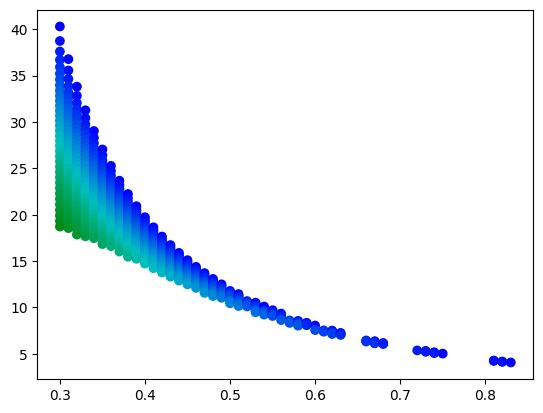

In [14]:
fig, ax = plt.subplots()

ax.scatter(d_1_1_vecX, Z_1new_vecY, c=plot_colors)
plt.show()


In [17]:
table_file = pd.read_excel(f + '\\Разбивка\\split_table.xlsx')
table_file

splits_Z_new = table_file['Z_new_1'].append(table_file['Z_new_2']).append(table_file['Z_new_3'])
splits_d_1_1 = table_file['d_1_1'].append(table_file['d_1_2']).append(table_file['d_1_3'])
splits_alpha_1eef = table_file['alpha_1eef_1'].append(table_file['alpha_1eef_2']).append(table_file['alpha_1eef_3'])
splits_alpha_1eef_color = []
for angle in splits_alpha_1eef:
    splits_alpha_1eef_color.append(colors_dict.get(angle))
    
len(splits_alpha_1eef_color), len(splits_d_1_1)

C:\Users\Мотя\AppData\Local\Temp\ipykernel_3256\2784244723.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  splits_Z_new = table_file['Z_new_1'].append(table_file['Z_new_2']).append(table_file['Z_new_3'])
C:\Users\Мотя\AppData\Local\Temp\ipykernel_3256\2784244723.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  splits_d_1_1 = table_file['d_1_1'].append(table_file['d_1_2']).append(table_file['d_1_3'])
C:\Users\Мотя\AppData\Local\Temp\ipykernel_3256\2784244723.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  splits_alpha_1eef = table_file['alpha_1eef_1'].append(table_file['alpha_1eef_2']).append(table_file['alpha_1eef_3'])


(27471, 27471)

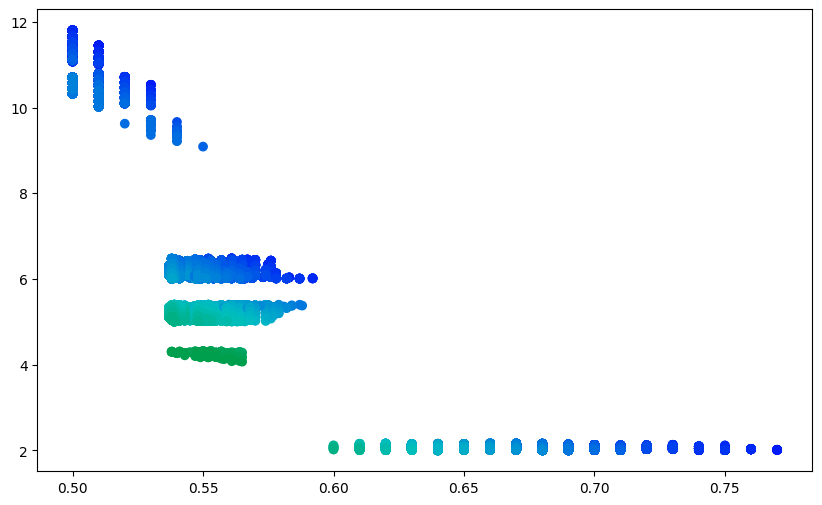

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(splits_d_1_1, splits_Z_new, c=splits_alpha_1eef_color)
plt.show()
